In [1]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np 
from scipy.signal import welch
from detect_peaks import detect_peaks

In [2]:
from functions import GenerateIMSDictionary
from functions import ReplaceSignalDataofInterest
from functions import getPlot
from functions import plotPeaks
from functions import PosMagnitude

"""
!!!!!PLEASE NOTE!!!!!

The rest of this code uses older functions (i.e. same functionality 
different input format)

The functions below don't use the WorkingDictionary format.

The older functions help with quick demonstation purposes

"""

HomeDirectory = "/Users/tbryan/Desktop/9 2019 Fall/ECEN 403/Programming/ProgramsForDemo/FINAL"
os.chdir(HomeDirectory)
file = '2003.10.22.12.06.24'
data = pd.read_table(file,header = None)
data.columns = ['b1x','b1y','b2x','b2y','b3x','b3y','b4x','b4y']
IMSDictionary = GenerateIMSDictionary(file,"FinalTrainingData.csv",os.getcwd())
DF = ReplaceSignalDataofInterest(np.transpose(data.values[:,0]),IMSDictionary,file)

In [3]:
b1x = np.transpose(data.values[:,0])
b1y = np.transpose(data.values[:,1])
b2x = np.transpose(data.values[:,2])
b2y = np.transpose(data.values[:,3])
b3x = np.transpose(data.values[:,4])
b3y = np.transpose(data.values[:,5])
b4x = np.transpose(data.values[:,6])
b4y = np.transpose(data.values[:,7])
x = data.index.values

In [4]:
#DC Offset Removal
b1x = b1x - np.mean(b1x)
b1y = b1y - np.mean(b1y)
b2x = b2x - np.mean(b2x)
b2y = b2y - np.mean(b2y)
b3x = b3x - np.mean(b3x)
b3y = b3y - np.mean(b3y)
b4x = b4x - np.mean(b4x)
b5y = b4y - np.mean(b4y)

In [5]:
def FourierTransform(comb_sig, T, N, f_s):
    #Fast Fourier Transform
    #number_of_time_samples = len(t)
    number_of_time_samples = N
    frq = np.arange(number_of_time_samples)/(Tmax)# two sides frequency range
    frq = frq[range(int(number_of_time_samples/(2)))] # one side frequency range
    Y = abs(np.fft.fft(comb_sig))/number_of_time_samples # fft computing and normalization
    Y = Y[range(int(number_of_time_samples/2))]
    #End fft
    x = {
        "Frequency":frq,
        "Freq. Amp.": Y
        }
    return x

In [6]:
SampleFrequency = 20000
#FrequencyResolution = 0.1
NumberOfSamples = len(data.index.values)
dt = 1/SampleFrequency
#Tmax = 1 / FrequencyResolution
Tmax = dt*NumberOfSamples
t = np.arange(0,Tmax,dt) #same as x*dt

In [7]:
b1xfft = FourierTransform(b1x,Tmax,NumberOfSamples,SampleFrequency)
b1yfft = FourierTransform(b1y,Tmax,NumberOfSamples,SampleFrequency)
b2xfft = FourierTransform(b2x,Tmax,NumberOfSamples,SampleFrequency)
b2yfft = FourierTransform(b2y,Tmax,NumberOfSamples,SampleFrequency)
b3xfft = FourierTransform(b3x,Tmax,NumberOfSamples,SampleFrequency)
b3yfft = FourierTransform(b3y,Tmax,NumberOfSamples,SampleFrequency)
b4xfft = FourierTransform(b4x,Tmax,NumberOfSamples,SampleFrequency)
b4yfft = FourierTransform(b4y,Tmax,NumberOfSamples,SampleFrequency)


finished


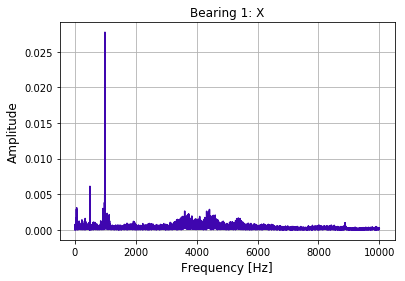

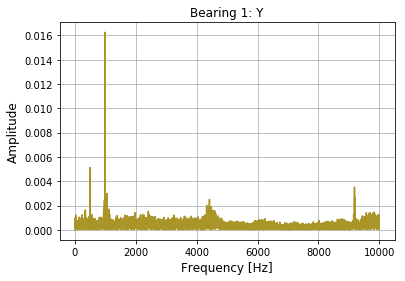

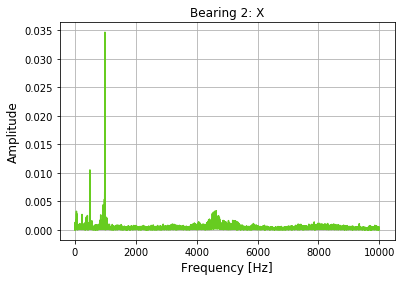

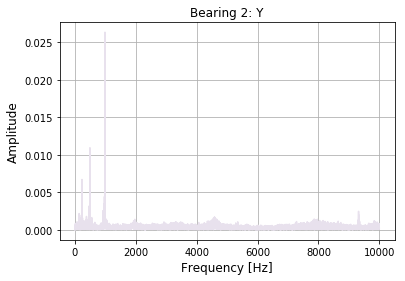

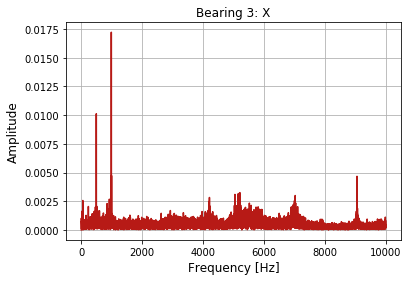

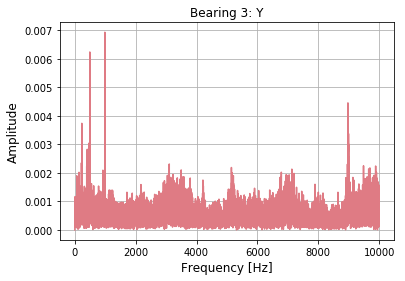

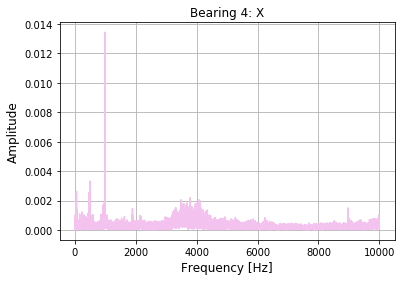

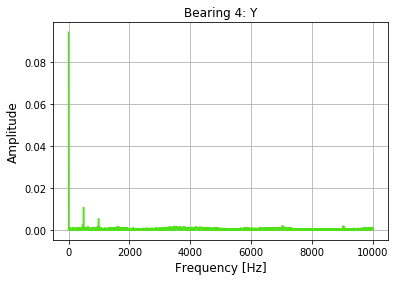

In [8]:
fftfigs = []
fftfigs.append(getPlot(b1xfft['Frequency'],b1xfft['Freq. Amp.'],'Frequency [Hz]','Amplitude',"Bearing 1: X"))
fftfigs.append(getPlot(b1yfft['Frequency'],b1yfft['Freq. Amp.'],'Frequency [Hz]','Amplitude',"Bearing 1: Y"))
fftfigs.append(getPlot(b2xfft['Frequency'],b2xfft['Freq. Amp.'],'Frequency [Hz]','Amplitude',"Bearing 2: X"))
fftfigs.append(getPlot(b2yfft['Frequency'],b2yfft['Freq. Amp.'],'Frequency [Hz]','Amplitude',"Bearing 2: Y"))
fftfigs.append(getPlot(b3xfft['Frequency'],b3xfft['Freq. Amp.'],'Frequency [Hz]','Amplitude',"Bearing 3: X"))
fftfigs.append(getPlot(b3yfft['Frequency'],b3yfft['Freq. Amp.'],'Frequency [Hz]','Amplitude',"Bearing 3: Y"))
fftfigs.append(getPlot(b4xfft['Frequency'],b4xfft['Freq. Amp.'],'Frequency [Hz]','Amplitude',"Bearing 4: X"))
fftfigs.append(getPlot(b4yfft['Frequency'],b4yfft['Freq. Amp.'],'Frequency [Hz]','Amplitude',"Bearing 4: Y"))

print('finished')

In [9]:
def get_psd_values(comb_sig, T, N, fs):
    frq, psd_values = welch(comb_sig, fs=fs)
    x = {
        "Frequency":frq,
        "PSD": psd_values
        }
    return x

In [10]:
b1xPSD = get_psd_values(b1x,Tmax,NumberOfSamples,SampleFrequency)
b1yPSD = get_psd_values(b1y,Tmax,NumberOfSamples,SampleFrequency)
b2xPSD = get_psd_values(b2x,Tmax,NumberOfSamples,SampleFrequency)
b2yPSD = get_psd_values(b2y,Tmax,NumberOfSamples,SampleFrequency)
b3xPSD = get_psd_values(b3x,Tmax,NumberOfSamples,SampleFrequency)
b3yPSD = get_psd_values(b3y,Tmax,NumberOfSamples,SampleFrequency)
b4xPSD = get_psd_values(b4x,Tmax,NumberOfSamples,SampleFrequency)
b4yPSD = get_psd_values(b4y,Tmax,NumberOfSamples,SampleFrequency)

finished


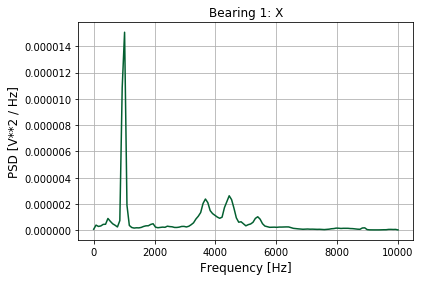

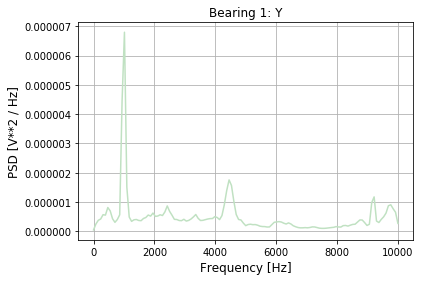

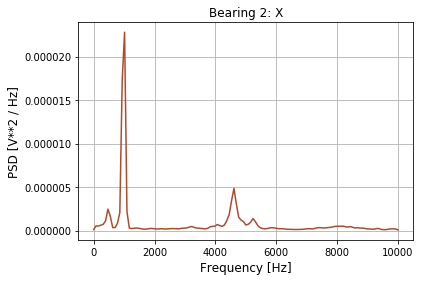

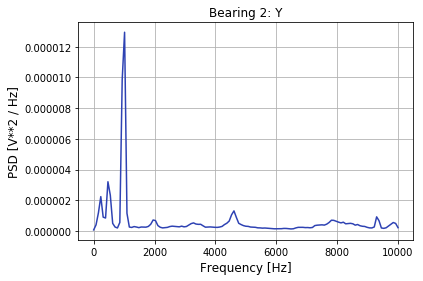

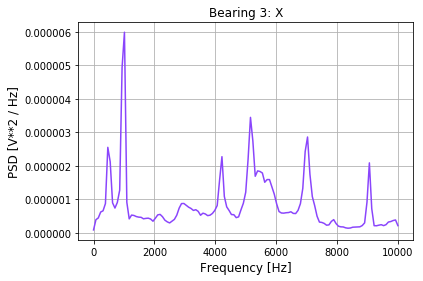

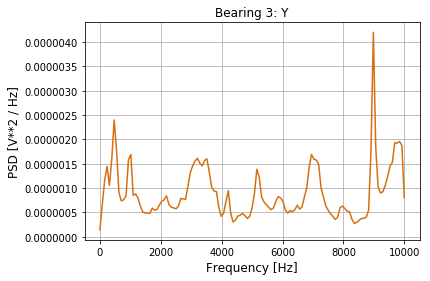

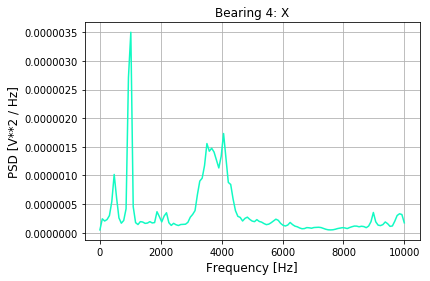

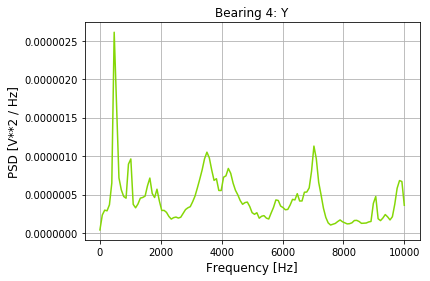

In [11]:
psdfigs = []
psdfigs.append(getPlot(b1xPSD['Frequency'],b1xPSD['PSD'],'Frequency [Hz]','PSD [V**2 / Hz]',"Bearing 1: X"))
psdfigs.append(getPlot(b1yPSD['Frequency'],b1yPSD['PSD'],'Frequency [Hz]','PSD [V**2 / Hz]',"Bearing 1: Y"))
psdfigs.append(getPlot(b2xPSD['Frequency'],b2xPSD['PSD'],'Frequency [Hz]','PSD [V**2 / Hz]',"Bearing 2: X"))
psdfigs.append(getPlot(b2yPSD['Frequency'],b2yPSD['PSD'],'Frequency [Hz]','PSD [V**2 / Hz]',"Bearing 2: Y"))
psdfigs.append(getPlot(b3xPSD['Frequency'],b3xPSD['PSD'],'Frequency [Hz]','PSD [V**2 / Hz]',"Bearing 3: X"))
psdfigs.append(getPlot(b3yPSD['Frequency'],b3yPSD['PSD'],'Frequency [Hz]','PSD [V**2 / Hz]',"Bearing 3: Y"))
psdfigs.append(getPlot(b4xPSD['Frequency'],b4xPSD['PSD'],'Frequency [Hz]','PSD [V**2 / Hz]',"Bearing 4: X"))
psdfigs.append(getPlot(b4yPSD['Frequency'],b4yPSD['PSD'],'Frequency [Hz]','PSD [V**2 / Hz]',"Bearing 4: Y"))

print('finished')

In [12]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]
 
def get_autocorr_values(comb_sig, T, N, f_s):
    autocorr_values = autocorr(comb_sig)
    x_values = np.array([T * jj for jj in range(0, N)])
    x = {
        "X Values":x_values,
        "Autocorr Values": autocorr_values
        }
    return x

In [13]:
b1xacv = get_autocorr_values(b1x, Tmax, NumberOfSamples, SampleFrequency)
b1yacv = get_autocorr_values(b1y, Tmax, NumberOfSamples, SampleFrequency)
b2xacv = get_autocorr_values(b2x, Tmax, NumberOfSamples, SampleFrequency)
b2yacv = get_autocorr_values(b2y, Tmax, NumberOfSamples, SampleFrequency)
b3xacv = get_autocorr_values(b3x, Tmax, NumberOfSamples, SampleFrequency)
b3yacv = get_autocorr_values(b3y, Tmax, NumberOfSamples, SampleFrequency)
b4xacv = get_autocorr_values(b4x, Tmax, NumberOfSamples, SampleFrequency)
b4yacv = get_autocorr_values(b4y, Tmax, NumberOfSamples, SampleFrequency)

finished


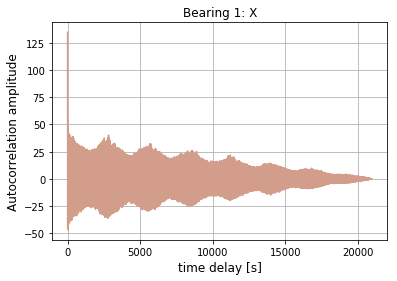

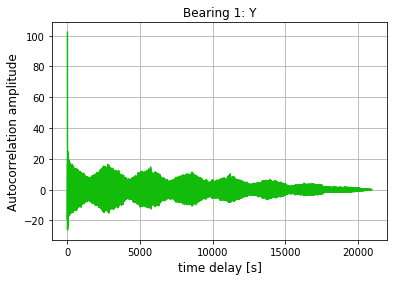

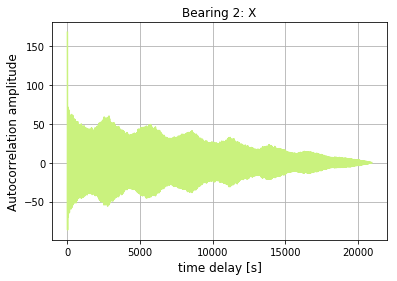

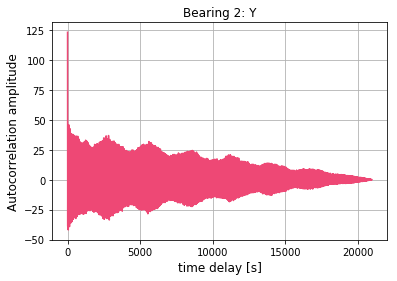

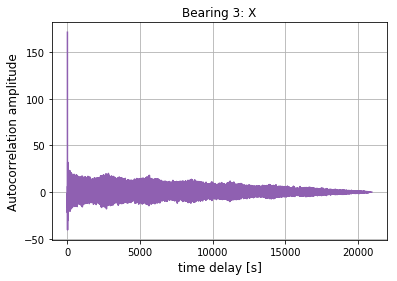

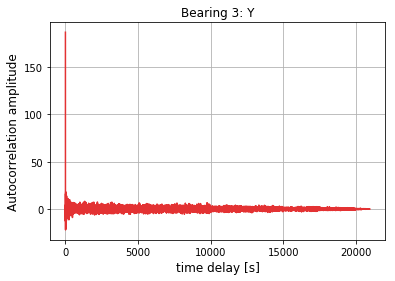

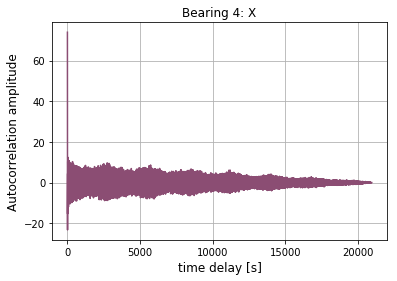

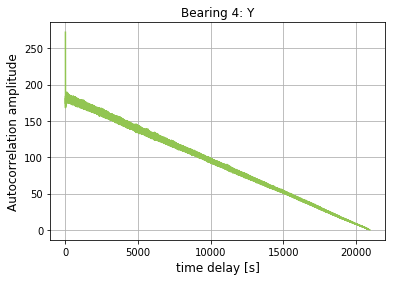

In [14]:
acfigs = []
acfigs.append(getPlot(b1xacv['X Values'],b1xacv['Autocorr Values'],'time delay [s]','Autocorrelation amplitude',"Bearing 1: X"))
acfigs.append(getPlot(b1yacv['X Values'],b1yacv['Autocorr Values'],'time delay [s]','Autocorrelation amplitude',"Bearing 1: Y"))
acfigs.append(getPlot(b2xacv['X Values'],b2xacv['Autocorr Values'],'time delay [s]','Autocorrelation amplitude',"Bearing 2: X"))
acfigs.append(getPlot(b2yacv['X Values'],b2yacv['Autocorr Values'],'time delay [s]','Autocorrelation amplitude',"Bearing 2: Y"))
acfigs.append(getPlot(b3xacv['X Values'],b3xacv['Autocorr Values'],'time delay [s]','Autocorrelation amplitude',"Bearing 3: X"))
acfigs.append(getPlot(b3yacv['X Values'],b3yacv['Autocorr Values'],'time delay [s]','Autocorrelation amplitude',"Bearing 3: Y"))
acfigs.append(getPlot(b4xacv['X Values'],b4xacv['Autocorr Values'],'time delay [s]','Autocorrelation amplitude',"Bearing 4: X"))
acfigs.append(getPlot(b4yacv['X Values'],b4yacv['Autocorr Values'],'time delay [s]','Autocorrelation amplitude',"Bearing 4: Y"))

print('finished')

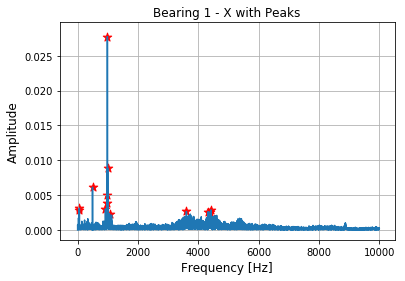

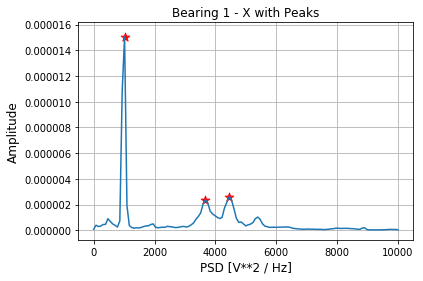

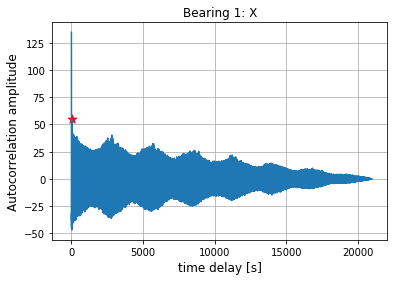

finished


In [15]:
fig = plotPeaks(b1xfft['Frequency'],b1xfft['Freq. Amp.'],"Frequency [Hz]","Amplitude","Bearing 1 - X with Peaks")
fig = plotPeaks(b1xPSD['Frequency'],b1xPSD['PSD'],'PSD [V**2 / Hz]',"Amplitude","Bearing 1 - X with Peaks")
fig = plotPeaks(b1xacv['X Values'],b1xacv['Autocorr Values'],'time delay [s]','Autocorrelation amplitude',"Bearing 1: X")

print('finished')

finished


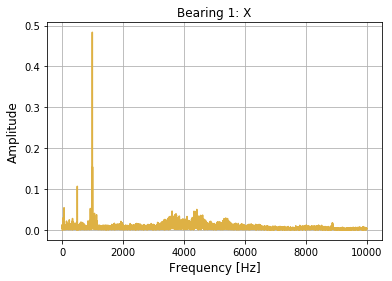

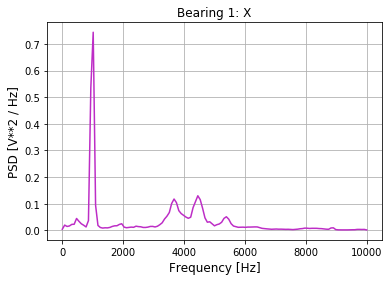

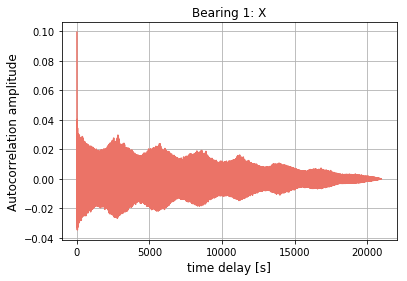

In [16]:
getPlot(b1xfft['Frequency'],b1xfft['Freq. Amp.']/PosMagnitude(b1xfft['Freq. Amp.']),'Frequency [Hz]','Amplitude',"Bearing 1: X")
getPlot(b1xPSD['Frequency'],b1xPSD['PSD']/PosMagnitude(b1xPSD['PSD']),'Frequency [Hz]','PSD [V**2 / Hz]',"Bearing 1: X")
getPlot(b1xacv['X Values'],b1xacv['Autocorr Values']/PosMagnitude(b1xacv['Autocorr Values']),'time delay [s]','Autocorrelation amplitude',"Bearing 1: X")

print('finished')